In [1]:
import random
import numpy
import theano
import model

/Users/ruixiongshi/anaconda/envs/theano/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [6]:
m = model.Model(artificial_font=True)
m.try_load()
run_fn = m.get_run_fn()
W = m.get_font_embeddings()

float64
loading model...
dont have value for dense_0.b
dont have value for dense_1.b
dont have value for dense_2.b
dont have value for dense_3.b


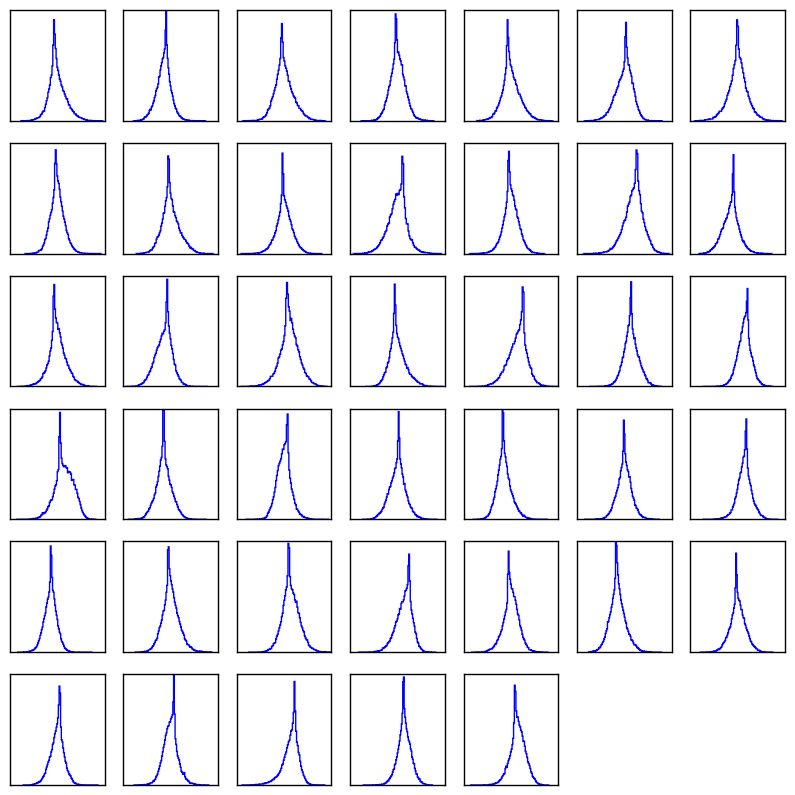

In [7]:
fig = plt.figure(figsize=(10, 10))
for i in range(40):
    ax1 = fig.add_subplot(6,7,i+1)
    n, bins, patches = ax1.hist(W[:,i],100,histtype='step')
    plt.xticks([]), plt.yticks([])

# Random perturbations for a single font

In [2]:
m = model.Model(artificial_font=True)
m.try_load()
run_fn = m.get_run_fn()
W = m.get_font_embeddings()

float64
loading model...


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named mkl


In [11]:
def generate_input():
    fonts = [random.choice(W)]
    for p in numpy.linspace(-0.03, 0.03, 10):
        print p
        batch_is = numpy.zeros((m.k, m.d), dtype=theano.config.floatX)
        batch_js = numpy.zeros((m.k,), dtype=numpy.int32)
        for z in xrange(m.k):
            batch_is[z] = fonts[0] + p
            batch_js[z] = z

        yield batch_is, batch_js

print 'generating...'
frame = 0
for input_i, input_j in generate_input():
    img = model.draw_grid(run_fn(input_i, input_j))
    img.save('random_perturb/font_%06d.png' % frame)
    frame += 1

generating...
-0.03
-0.0233333333333
-0.0166666666667
-0.01
-0.00333333333333
0.00333333333333
0.01
0.0166666666667
0.0233333333333
0.03


In [14]:
m = model.Model(artificial_font=True)
m.try_load()
run_fn = m.get_run_fn()
W = m.get_font_embeddings()
cov = numpy.cov(W.T)

float64
loading model...


In [20]:
def generate_font():
    return numpy.random.multivariate_normal(mean=numpy.zeros(m.d), cov=cov)

def generate_input(n_fonts=4):
    fonts = [generate_font() for f in xrange(n_fonts)]
    for f in xrange(n_fonts):
        a, b = fonts[f], fonts[(f+1)%n_fonts]
        for p in numpy.linspace(0, 1, 10):
            print f, p
            batch_is = numpy.zeros((m.k, m.d), dtype=theano.config.floatX)
            batch_js = numpy.zeros((m.k,), dtype=numpy.int32)
            for z in xrange(m.k):
                batch_is[z] = a * (1-p) + b * p
                batch_js[z] = z

            yield batch_is, batch_js

In [21]:
print 'generating...'
frame = 0
for input_i, input_j in generate_input():
    img = model.draw_grid(run_fn(input_i, input_j))
    img.save('multivariate_norm/font_%06d.png' % frame)
    frame += 1

generating...
0 0.0
0 0.111111111111
0 0.222222222222
0 0.333333333333
0 0.444444444444
0 0.555555555556
0 0.666666666667
0 0.777777777778
0 0.888888888889
0 1.0
1 0.0
1 0.111111111111
1 0.222222222222
1 0.333333333333
1 0.444444444444
1 0.555555555556
1 0.666666666667
1 0.777777777778
1 0.888888888889
1 1.0
2 0.0
2 0.111111111111
2 0.222222222222
2 0.333333333333
2 0.444444444444
2 0.555555555556
2 0.666666666667
2 0.777777777778
2 0.888888888889
2 1.0
3 0.0
3 0.111111111111
3 0.222222222222
3 0.333333333333
3 0.444444444444
3 0.555555555556
3 0.666666666667
3 0.777777777778
3 0.888888888889
3 1.0
